# finalProjectGrouping3
* 都是以每個客戶。  
* 原本都是用訂單量，現在使用購物車為單筆訂單。  

需要的欄位(每個客戶)：  
* 總購物車數  
* 訂單總折扣金額  
* 訂單總花費金額(原價)  

備註：
* 以下訂單量都是指：一個購物車=一個訂單

In [2]:
import pandas as pd
df_Order_ori = pd.read_csv('data/Ntu_Orders.csv')

先留下成功的訂單

In [3]:
df_OrderFin = df_Order_ori[df_Order_ori['SalesOrderSlaveStatusDef']=='Finish']
df_OrderFin['SalesOrderSlaveStatusDef'].head()

0    Finish
1    Finish
2    Finish
3    Finish
4    Finish
Name: SalesOrderSlaveStatusDef, dtype: object

In [4]:
data = df_OrderFin.groupby(by=['MemberId', 'TradesOrderGroupCode'], as_index=False)['PromotionDiscount', 'EcouponDiscount', 'SalesOrderSlaveTotalPayment'].sum()
df_OrderByMIDandTOGC = pd.DataFrame(data)
df_OrderByMIDandTOGC.head()

MemberId  \
0  00002962-4E01-4D5B-A23C-AF05A965212E   
1  00002962-4E01-4D5B-A23C-AF05A965212E   
2  000037B9-82D7-4F41-A748-FD64AF00A535   
3  00004BE7-17B5-4DA8-A31D-673BCD22F018   
4  00008557-6564-46EB-8B00-70D3DEE91FF0   

                                TradesOrderGroupCode  PromotionDiscount  \
0  b'\xb2\xfc\x082\xe8\xe1$\xd6#xWgW`\xe93\xa3\xc...              -85.0   
1  b'\xc1h\xe5&\xc3\xd2p\xbbWq\x86\x044 $\xd4\x9c...             -431.0   
2  b'}\x8b\x82O.\xd4\x95%5\xe1]\x87\xc7\xe6\xb0/\...             -100.0   
3  b'\xf2K\x82\xb1l9tC\xa3\x93\x16gx]\xc2I6\xe8\x...                0.0   
4  b'\xc4q\xce\xaa~\xf5=\x19j\xd2qN\xc4\xee\x81\t...                0.0   

   EcouponDiscount  SalesOrderSlaveTotalPayment  
0              0.0                       3359.0  
1              0.0                       2183.0  
2              0.0                       1196.0  
3              0.0                        316.0  
4           -150.0                        699.0

接下來計算活動使用量

In [8]:
df_OrderByMIDandTOGC['promotionUse']=0
df_OrderByMIDandTOGC['promotionUse'][df_OrderByMIDandTOGC['PromotionDiscount']<0]=1
df_OrderByMIDandTOGC['EcouponcUse']=0
df_OrderByMIDandTOGC['EcouponcUse'][df_OrderByMIDandTOGC['EcouponDiscount']<0]=1
df_OrderByMIDandTOGC.head()

/home/sopper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sopper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


MemberId  \
0  00002962-4E01-4D5B-A23C-AF05A965212E   
1  00002962-4E01-4D5B-A23C-AF05A965212E   
2  000037B9-82D7-4F41-A748-FD64AF00A535   
3  00004BE7-17B5-4DA8-A31D-673BCD22F018   
4  00008557-6564-46EB-8B00-70D3DEE91FF0   

                                TradesOrderGroupCode  PromotionDiscount  \
0  b'\xb2\xfc\x082\xe8\xe1$\xd6#xWgW`\xe93\xa3\xc...              -85.0   
1  b'\xc1h\xe5&\xc3\xd2p\xbbWq\x86\x044 $\xd4\x9c...             -431.0   
2  b'}\x8b\x82O.\xd4\x95%5\xe1]\x87\xc7\xe6\xb0/\...             -100.0   
3  b'\xf2K\x82\xb1l9tC\xa3\x93\x16gx]\xc2I6\xe8\x...                0.0   
4  b'\xc4q\xce\xaa~\xf5=\x19j\xd2qN\xc4\xee\x81\t...                0.0   

   EcouponDiscount  SalesOrderSlaveTotalPayment  promotionUse  EcouponcUse  
0              0.0                       3359.0             1            0  
1              0.0                       2183.0             1            0  
2              0.0                       1196.0             1            0  
3              0.0                        316.0             0            0  
4           -150.0                        699.0             0            1

接著groupby memberid來算出訂單量df

In [9]:
data = df_OrderByMIDandTOGC.groupby(by=['MemberId'])['TradesOrderGroupCode'].count()
df_orderSum = pd.DataFrame(data)
df_orderSum.head()

TradesOrderGroupCode
MemberId                                                  
00002962-4E01-4D5B-A23C-AF05A965212E                     2
000037B9-82D7-4F41-A748-FD64AF00A535                     1
00004BE7-17B5-4DA8-A31D-673BCD22F018                     1
00008557-6564-46EB-8B00-70D3DEE91FF0                     1
000248F1-4864-40B7-A987-E27884C0971C                     1

接著將df_OrderByMIDandTOGC groupby memberid，計算訂單總折扣金額、訂單總花費金額(原價)。  

In [10]:
data = df_OrderByMIDandTOGC.groupby(by=['MemberId'], as_index=False)['PromotionDiscount', 'EcouponDiscount', 'SalesOrderSlaveTotalPayment', 'promotionUse', 'EcouponcUse'].sum()
df_orderByMID = pd.DataFrame(data)
df_orderByMID.head()

MemberId  PromotionDiscount  EcouponDiscount  \
0  00002962-4E01-4D5B-A23C-AF05A965212E             -516.0              0.0   
1  000037B9-82D7-4F41-A748-FD64AF00A535             -100.0              0.0   
2  00004BE7-17B5-4DA8-A31D-673BCD22F018                0.0              0.0   
3  00008557-6564-46EB-8B00-70D3DEE91FF0                0.0           -150.0   
4  000248F1-4864-40B7-A987-E27884C0971C                0.0              0.0   

   SalesOrderSlaveTotalPayment  promotionUse  EcouponcUse  
0                       5542.0             2            0  
1                       1196.0             1            0  
2                        316.0             0            0  
3                        699.0             0            1  
4                        597.0             0            0

接著將df_orderSum Map進去

In [11]:
dict_orderSum = df_orderSum.to_dict('dict')
dict_orderSum['TradesOrderGroupCode']

{'00002962-4E01-4D5B-A23C-AF05A965212E': 2,
 '000037B9-82D7-4F41-A748-FD64AF00A535': 1,
 '00004BE7-17B5-4DA8-A31D-673BCD22F018': 1,
 '00008557-6564-46EB-8B00-70D3DEE91FF0': 1,
 '000248F1-4864-40B7-A987-E27884C0971C': 1,
 '000250B7-3E12-4E2F-8DFC-69ACFFCA40E9': 1,
 '00025802-0D68-43EA-B1ED-FB3C9CD849EB': 1,
 '0002954A-1267-4D54-8029-75F33C465F9B': 2,
 '0002971E-4BEF-4F61-8B60-79E137794422': 1,
 '0002B1F3-8C4B-457F-85A9-7CD5AB62DEA3': 1,
 '0002BC73-DD5D-4A3F-92BA-781027F0AD84': 1,
 '0002C910-4401-42AA-9B56-06D02595518C': 3,
 '00030386-0E49-4F5D-AE62-9D3DE3B8A882': 4,
 '00036808-0160-4A0C-834B-DE351E34094D': 1,
 '0003879A-92C5-45BD-A9ED-AEA68A6FB02B': 1,
 '00039C93-24F6-46CB-AAA6-BB9E53C4E683': 1,
 '0003A373-DA78-4C59-86B2-55EC351AAF19': 3,
 '0003A968-FC5C-4C28-A52F-AC7D9DACF26E': 1,
 '00040B11-6422-4086-B6DD-3C75ECB2CC13': 1,
 '00044271-09D0-449F-A7F6-976D85BC830D': 2,
 '000445B1-4551-4CA9-8529-C953C48CE230': 1,
 '0004840A-A290-4EE8-B9A7-FE5392A1E534': 1,
 '0004CF57-178F-4EB8-93A6-726C7D

In [12]:
df_orderByMID['orderSum'] = df_orderByMID['MemberId'].map(dict_orderSum['TradesOrderGroupCode'])
df_orderByMID.head()

MemberId  PromotionDiscount  EcouponDiscount  \
0  00002962-4E01-4D5B-A23C-AF05A965212E             -516.0              0.0   
1  000037B9-82D7-4F41-A748-FD64AF00A535             -100.0              0.0   
2  00004BE7-17B5-4DA8-A31D-673BCD22F018                0.0              0.0   
3  00008557-6564-46EB-8B00-70D3DEE91FF0                0.0           -150.0   
4  000248F1-4864-40B7-A987-E27884C0971C                0.0              0.0   

   SalesOrderSlaveTotalPayment  promotionUse  EcouponcUse  orderSum  
0                       5542.0             2            0         2  
1                       1196.0             1            0         1  
2                        316.0             0            0         1  
3                        699.0             0            1         1  
4                        597.0             0            0         1

接著新增欄位
* payOriginPerOrder: 每筆訂單平均花費金額(原價)。
    * payOriginPerOrder = (SalesOrderSlaveTotalPayment - PromotionDiscount)/orderSum
* payDCPercent(%): 每筆訂單平均折扣率。
    * payDCPercent(%) = PromotionDiscount/(SalesOrderSlaveTotalPayment - PromotionDiscount)*100
* actOrderPercent(%): 計算活動訂單佔比
    * actOrderPercent(%)=(promotionUse+EcouponcUse)/orderSum*100

In [14]:
df_orderByMID['payOriginPerOrder']=(df_orderByMID['SalesOrderSlaveTotalPayment']-df_orderByMID['PromotionDiscount'])/df_orderByMID['orderSum']
df_orderByMID['payDCPercent(%)']=df_orderByMID['PromotionDiscount'].abs()/(df_orderByMID['SalesOrderSlaveTotalPayment']-df_orderByMID['PromotionDiscount'])*100
df_orderByMID['actOrderPercent(%)']=(df_orderByMID['promotionUse']+df_orderByMID['EcouponcUse'])/df_orderByMID['orderSum']*100
df_orderByMID.head()

MemberId  PromotionDiscount  EcouponDiscount  \
0  00002962-4E01-4D5B-A23C-AF05A965212E             -516.0              0.0   
1  000037B9-82D7-4F41-A748-FD64AF00A535             -100.0              0.0   
2  00004BE7-17B5-4DA8-A31D-673BCD22F018                0.0              0.0   
3  00008557-6564-46EB-8B00-70D3DEE91FF0                0.0           -150.0   
4  000248F1-4864-40B7-A987-E27884C0971C                0.0              0.0   

   SalesOrderSlaveTotalPayment  promotionUse  EcouponcUse  orderSum  \
0                       5542.0             2            0         2   
1                       1196.0             1            0         1   
2                        316.0             0            0         1   
3                        699.0             0            1         1   
4                        597.0             0            0         1   

   payOriginPerOrder  payDCPercent(%)  actOrderPercent(%)  
0             3029.0         8.517663               100.0  
1             1296.0         7.716049               100.0  
2              316.0         0.000000                 0.0  
3              699.0         0.000000               100.0  
4              597.0         0.000000                 0.0

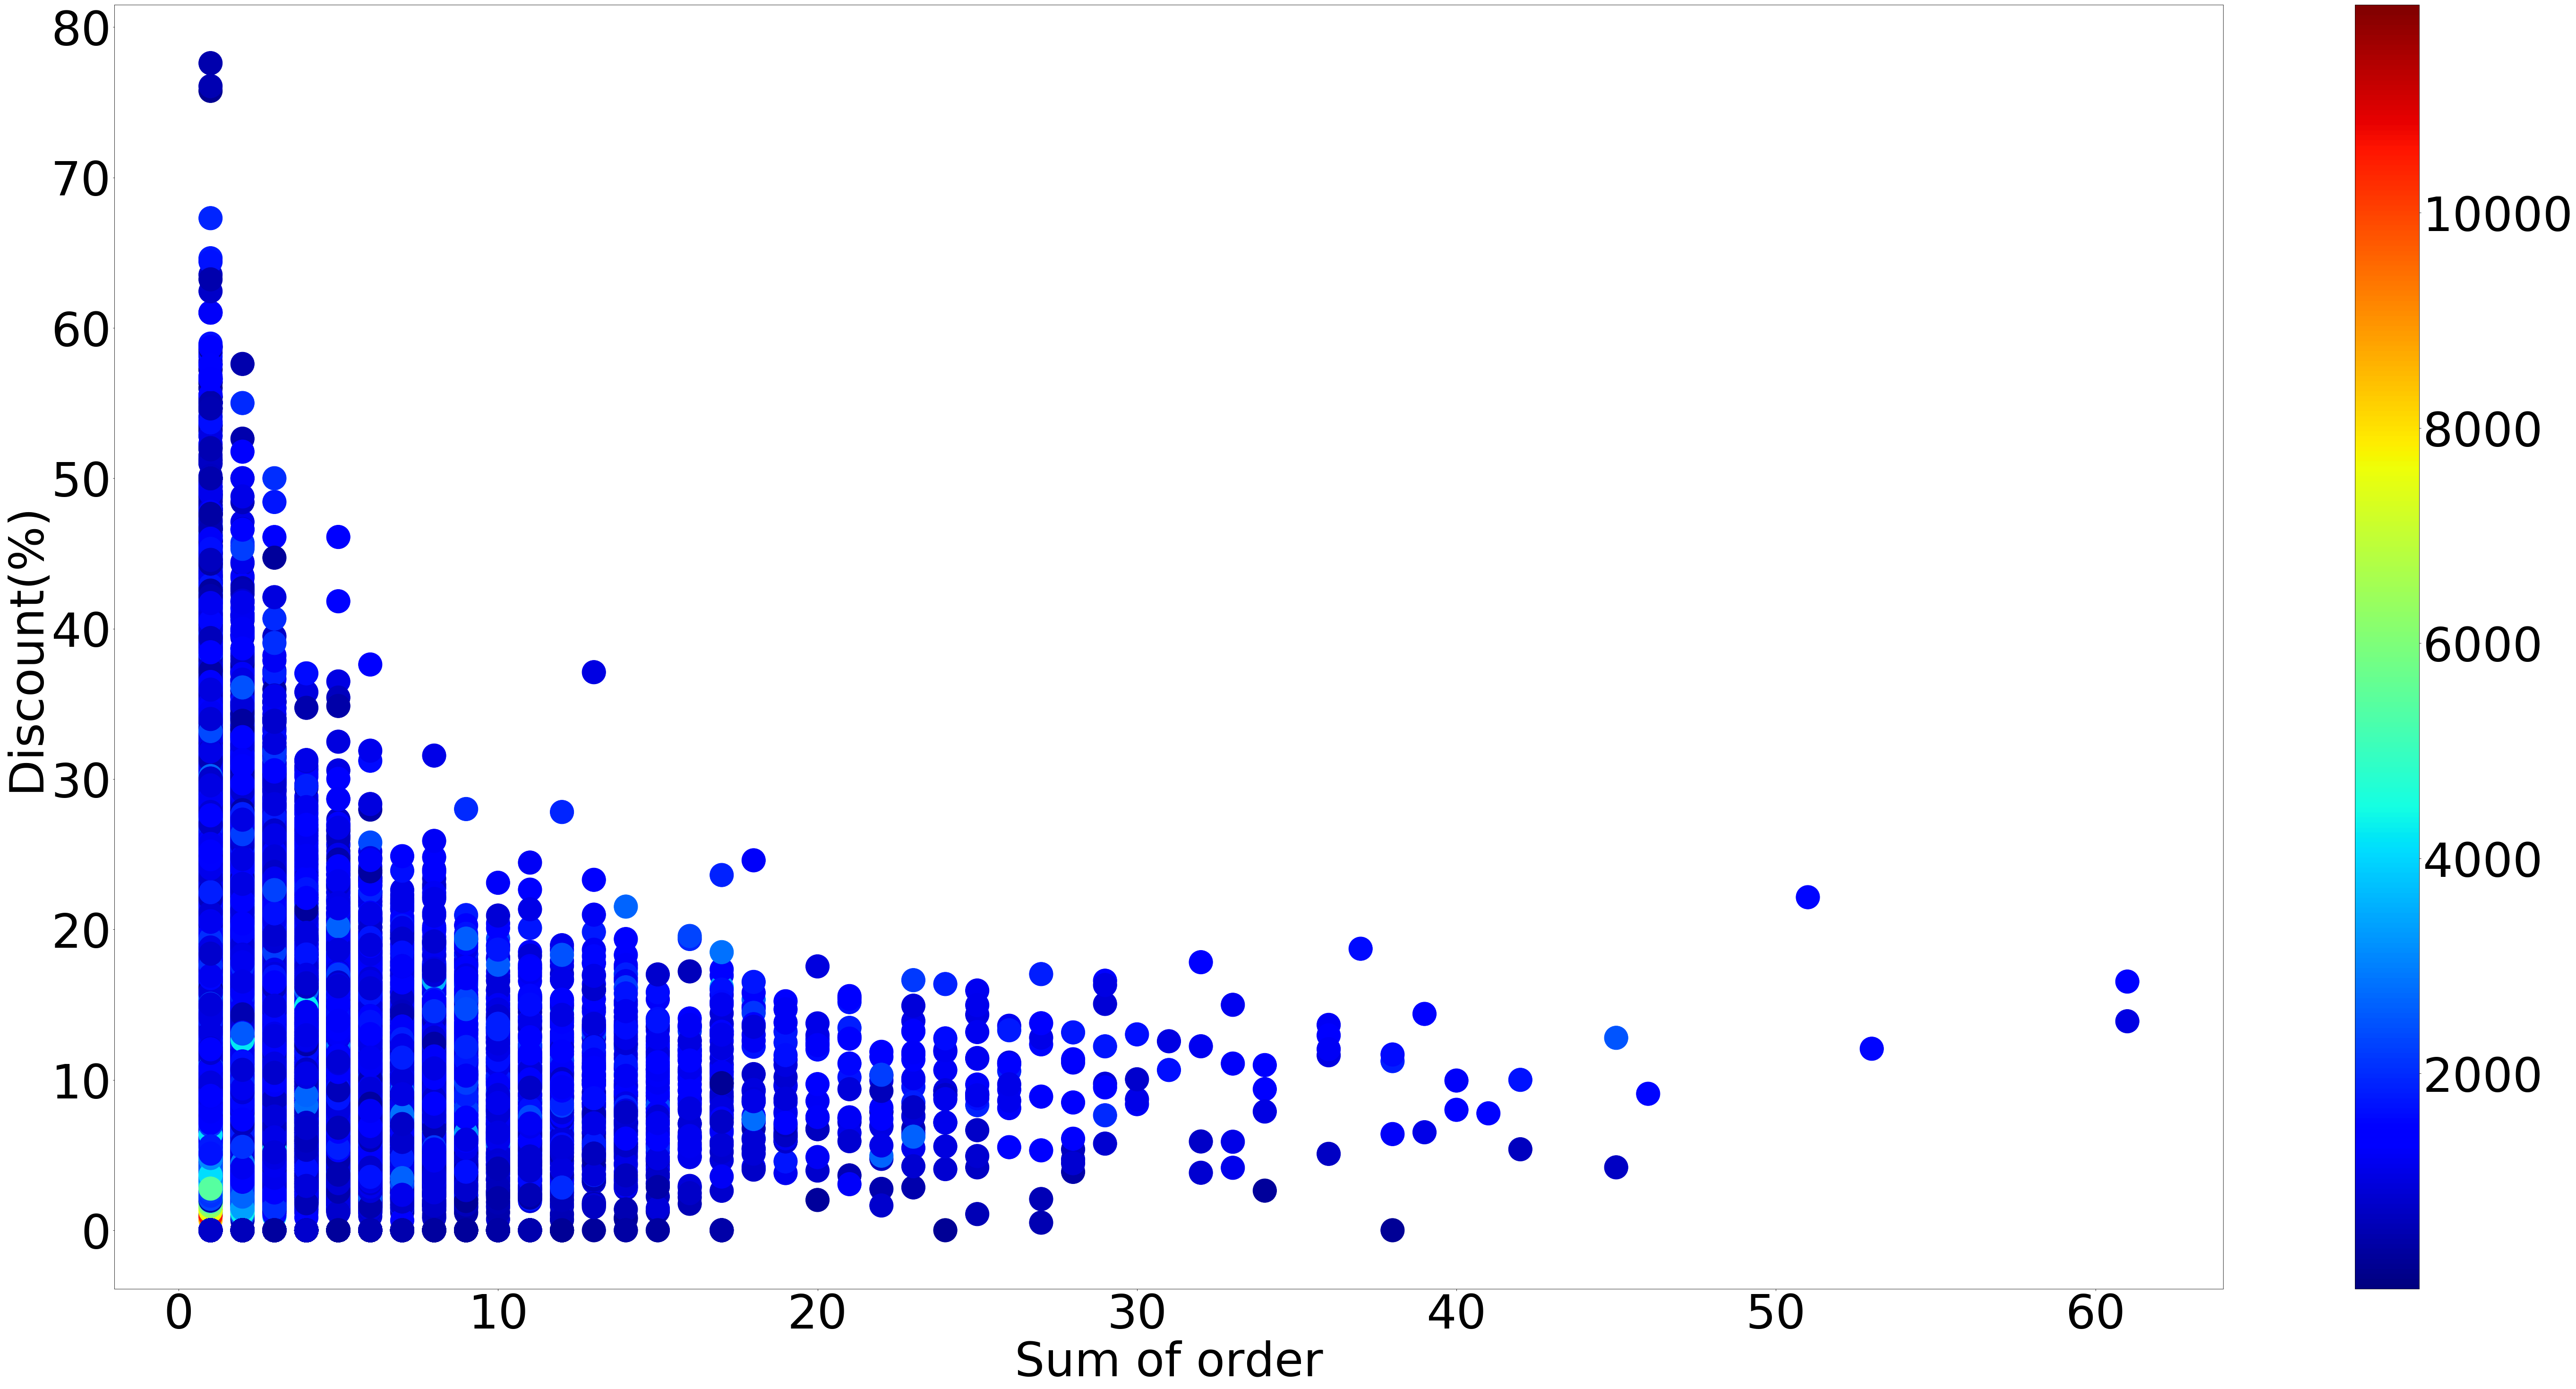

In [17]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams.update({'font.size': 100})
plt.figure(figsize=(100,50))
plt.xlabel("Sum of order")
plt.ylabel("Discount(%)")
cm = plt.cm.get_cmap('jet')
area = np.pi * 800
sc = plt.scatter(
    df_orderByMID['orderSum'], 
    df_orderByMID['payDCPercent(%)'], 
    s=area, 
    c=df_orderByMID['payOriginPerOrder'],
    cmap=cm, 
    alpha=1)
plt.colorbar(sc)
plt.show()

調整vmax

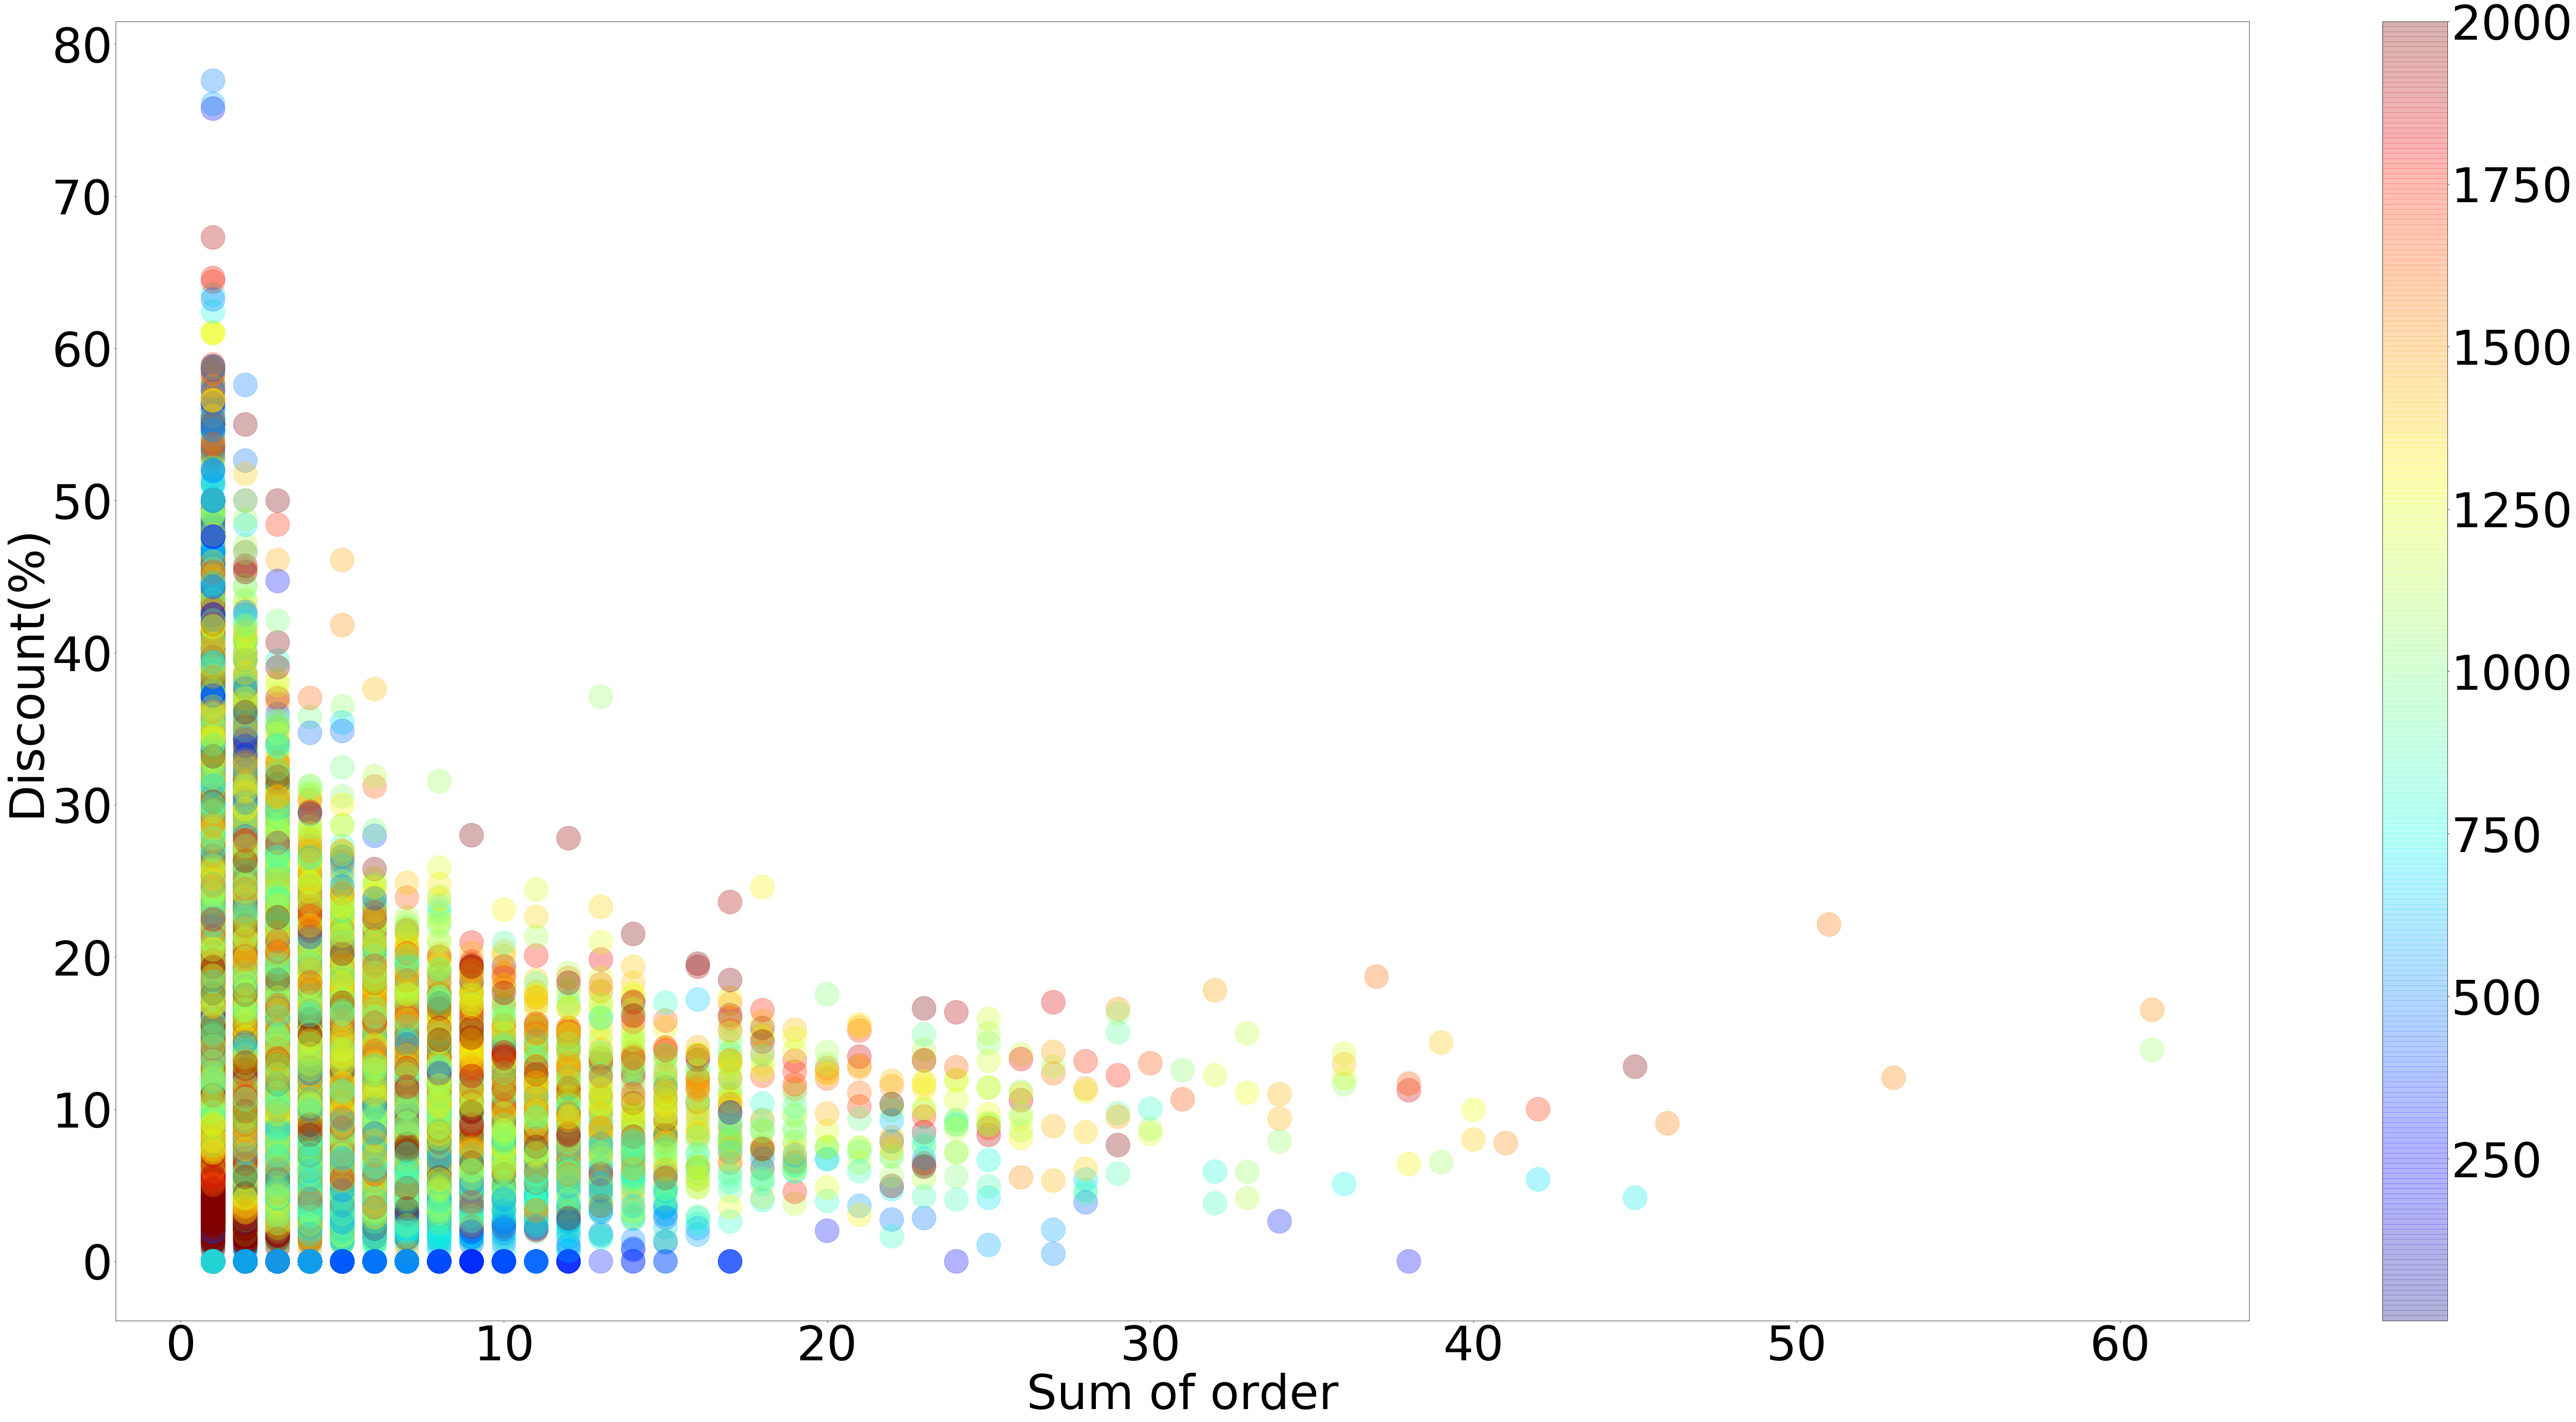

In [19]:
plt.figure(figsize=(100,50))
plt.xlabel("Sum of order")
plt.ylabel("Discount(%)")
cm = plt.cm.get_cmap('jet')
area = np.pi * 800
sc = plt.scatter(
    df_orderByMID['orderSum'], 
    df_orderByMID['payDCPercent(%)'], 
    s=area, 
    c=df_orderByMID['payOriginPerOrder'],
    cmap=cm,
    vmax=2000,
    alpha=0.3)
plt.colorbar(sc)
plt.show()

換個軸向試試看

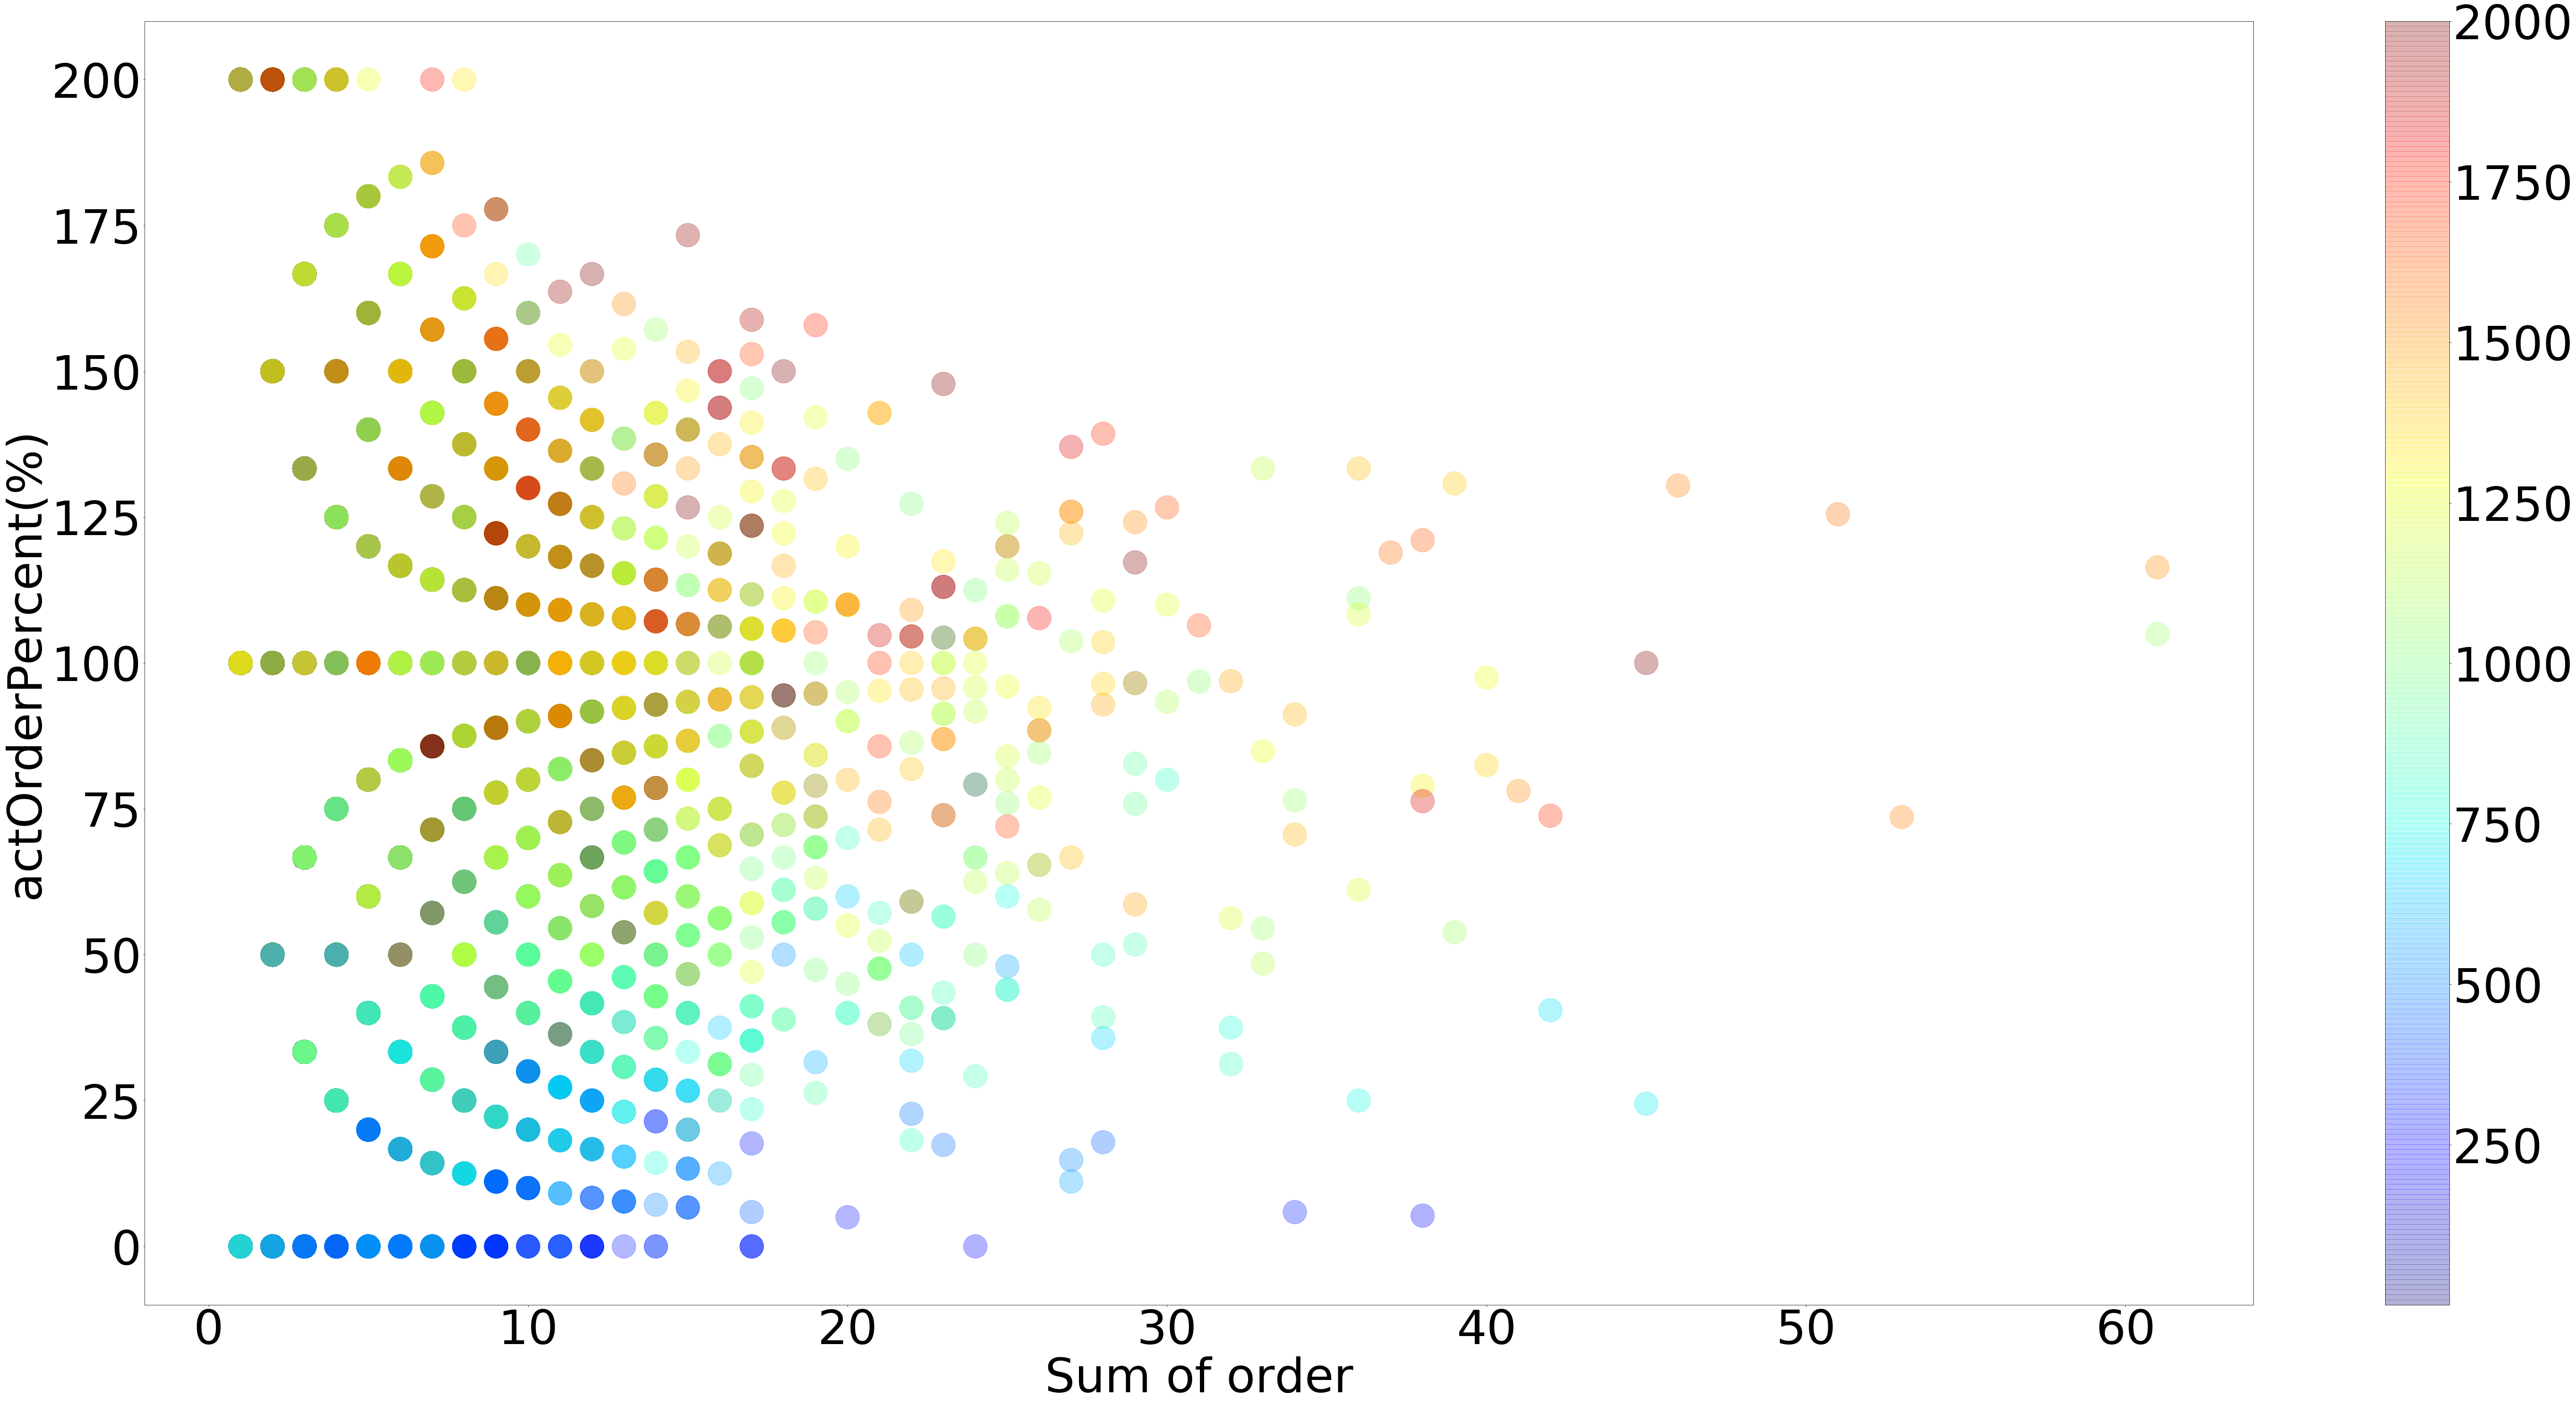

In [20]:
plt.figure(figsize=(100,50))
plt.xlabel("Sum of order")
plt.ylabel("actOrderPercent(%)")
cm = plt.cm.get_cmap('jet')
area = np.pi * 800
sc = plt.scatter(
    df_orderByMID['orderSum'], 
    df_orderByMID['actOrderPercent(%)'], 
    s=area, 
    c=df_orderByMID['payOriginPerOrder'],
    cmap=cm,
    vmax=2000,
    alpha=0.3)
plt.colorbar(sc)
plt.show()